<a href="https://colab.research.google.com/github/Adeve903/Ambuj-EDA-Hotel-booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

##IMPORTING MODULES AND LOADING DATA

---



In [45]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

In [46]:
#Mounting the drive
from google.colab import drive                    
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
#Reading the file
hotel_df = pd.read_csv("/content/drive/MyDrive/Hotel Booking/Hotel Bookings.csv")

##UNDERSTANDING THE DATA

In [48]:
#GETTING THE FIRST FIVE ENTRIES
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [49]:
#GETTING THE LAST FIVE ENTRIES
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [50]:
#GETTING ALL THE COLUMNS
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

####DATA DESCRIPTION

1. hotel: Name of hotel ( City or Resort)
2. is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
3. lead_time: time (in days) between booking transaction and actual arrival.
4. arrival_date_year: Year of arrival
5. arrival_date_month: month of arrival
6. arrival_date_week_number: week number of arrival date.
7. arrival_date_day_of_month: Day of month of arrival date
8. stays_in_weekend_nights: No. of weekend nights spent in a hotel
9. stays_in_week_nights: No. of weeknights spent in a hotel
10. adults: No. of adults in single booking record.
11. children: No. of children in single booking record.
12. babies: No. of babies in single booking record. 
13. meal: Type of meal chosen 
14. country: Country of origin of customers (as mentioned by them)
15. market_segment: What segment via booking was made and for what purpose.
16. distribution_channel: Via which medium booking was made.
17. is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for Yes)
18. previous_cancellations: No. of previous canceled bookings.
19. previous_bookings_not_canceled: No. of previous non-canceled bookings.
19. reserved_room_type: Room type reserved by a customer.
20. assigned_room_type: Room type assigned to the customer.
21. booking_changes: No. of booking changes done by customers
22. deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
23. agent: Id of agent for booking
24. company: Id of the company making a booking
25. days_in_waiting_list: No. of days on waiting list.
26. customer_type: Type of customer(Transient, Group, etc.)
27. adr: Average Daily rate.
28. required_car_parking_spaces: No. of car parking asked in booking
29. total_of_special_requests: total no. of special request.
30. reservation_status: Whether a customer has checked out or canceled,or not showed 
32. reservation_status_date: Date of making reservation status.

In [51]:
#GETTING THE SHAPE OF DATASET,i.e NO.OF ROWS AND COLUMNS
hotel_df.shape

(119390, 32)

In [52]:
#CHECKING DETAILS OF EVERY COLUMN
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [53]:
#GETTING THE INSSIGHTS OF THE DATA
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [54]:
#GETTING THE DATATYPES OF ALL COLUMNS
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [55]:
#GETTING THE UNIQUE VALUES IN COLUMNS
hotel_df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

##HANDLING THE MISSING AND DUPLICATES VALUES

In [56]:
#CHECKING THE DUPLICATES ROWS IN THE DATASET
hotel_df[hotel_df.duplicated()].shape

(31994, 32)

In [57]:
#REMOVING THE DUPLICATES
hotel_df.drop_duplicates(inplace=True)

In [58]:
hotel_df.shape

(87396, 32)

The dupliactes have been removed.

In [59]:
#COUNT OF MISSING VALUES
hotel_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


The columns country,children,company and agent have null values.So,we will replace these null values with 0.

In [60]:
#REPLACING THE MISSING VALUES WITH 0
hotel_df[['agent','children','company']] = hotel_df[['agent','children','company']].fillna(0)

The columns agent,company and children are in float data type, so the missing values has been replaced with 0.

In [61]:
hotel_df['country'].fillna('others',inplace=True)

The country is in object datatype, so the missing values has been replace with 'others'.

In [62]:
#CONVERTING DATATYPES OF AGENT,CHILDREN AND COMPANY  FROM FLOAT TO INTEGER
hotel_df[['agent','children','company']] = hotel_df[['agent','children','company']].astype('int64')

In [63]:
#ADDING IMPORTANT COLUMNS
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

#CREATING NEW COLUMN TOTAL PEOPLE BY ADDING ADULTS, CHILDRENS AND BABIES
hotel_df['total_people'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

##EXPLORATORY DATA ANALYSIS

####(1)Percentage of bookings in city hotel and resort hotel.

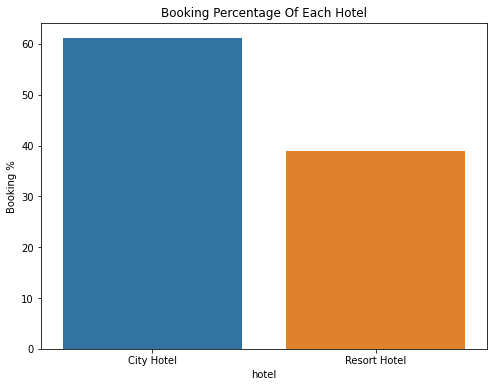

In [64]:
grouped_by_hotel = hotel_df.groupby('hotel')
hotel_pd = pd.DataFrame((grouped_by_hotel.size()/hotel_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,6))
sbn.barplot(x = hotel_pd['hotel'], y = hotel_pd['Booking %'] )
plt.title('Booking Percentage Of Each Hotel')
plt.show()

       CONCLUSION:The city hotel has 60% bookings while the resort hotel has 40% bookings. 

####(2)Which hotel makes more revenues?

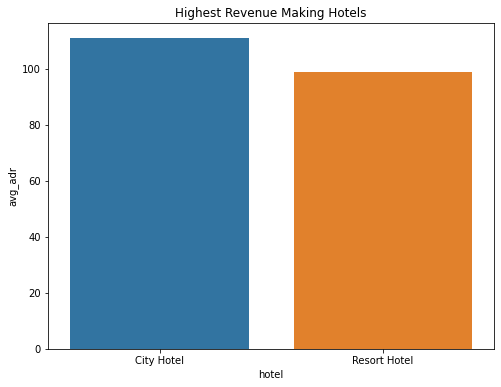

In [65]:
v1 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,6))
sbn.barplot(x = v1['hotel'], y = v1['avg_adr'] )
plt.title('Highest Revenue Making Hotels')
plt.show()

     CONCLUSION:City hotel seems to be making slightly more revenue.

####(3)Which meal type is most preffered by customers?

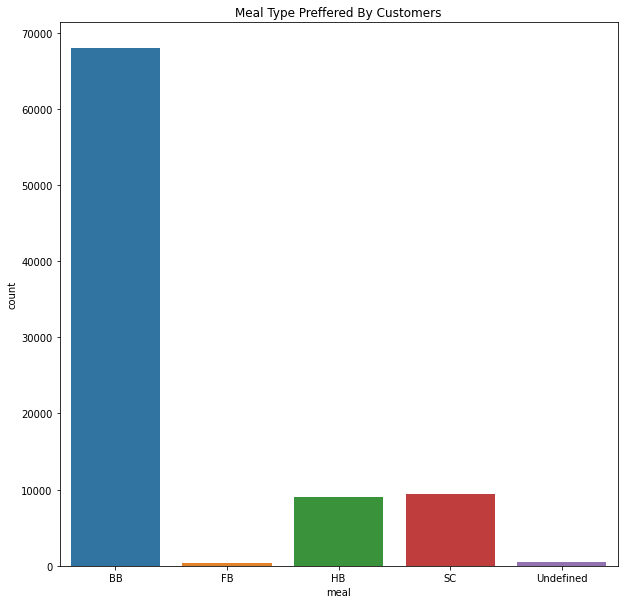

In [66]:
plt.figure(figsize=(10, 10))
sbn.countplot(x = hotel_df['meal'])
plt.title('Meal Type Preffered By Customers')
plt.show()

    CONCLUSION:Most preferred meal type is BB (Bed and breakfast).

####(4)Preferred length of stay in each hotel.

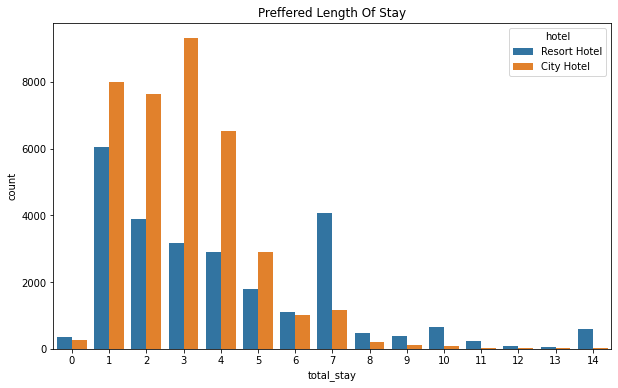

In [67]:
not_cancelled = hotel_df[hotel_df['is_canceled'] == 0]
v2 = not_cancelled[not_cancelled['total_stay'] < 15]
plt.figure(figsize = (10,6))
sbn.countplot(x = v2['total_stay'], hue = v2['hotel'])
plt.title('Preffered Length Of Stay')
plt.show()

    CONCLUSION:Preffered length of stay in city hotel is around 3 days and in resort hotel is around 2 days.

####(5)Agent making most number of bookings?

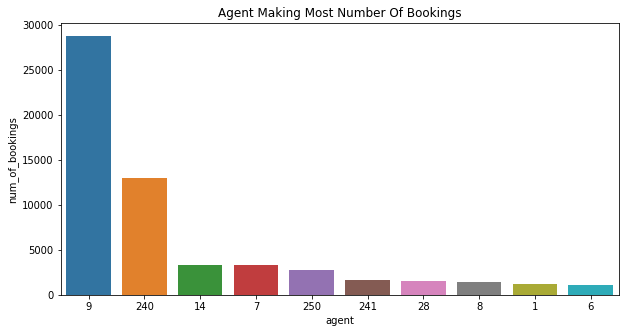

In [68]:
hotel_pd = pd.DataFrame(hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
hotel_pd.drop(hotel_pd[hotel_pd['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
hotel_pd = hotel_pd[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
plt.title('Agent Making Most Number Of Bookings')
sbn.barplot(x = 'agent', y = 'num_of_bookings', data = hotel_pd, order = hotel_pd.sort_values('num_of_bookings', ascending = False).agent)


    CONCLUSION:Agent no. 9 has made most no. of bookings.

####(6)Year with highest number of booking

Text(0.5, 1.0, 'Year Wise Bookings')

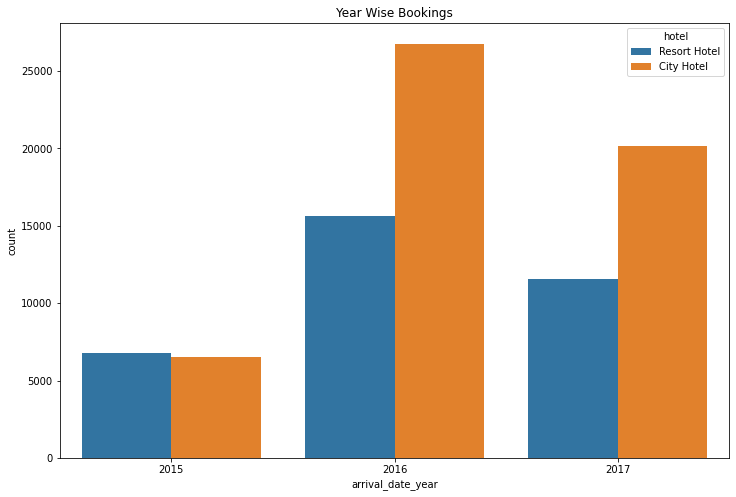

In [69]:
#Setting plot size
plt.figure(figsize=(12,8))

sbn.countplot(x = hotel_df['arrival_date_year'] , hue=hotel_df['hotel'])
plt.title("Year Wise Bookings")

    CONCLUSION:
    City hotels had the most of the bookings.
    2015 had less 7000 bookings.
    2016 had the higest bookings.

####(7)Preffered room type by the customer

Text(0.5, 1.0, 'Most Preferred Room Type')

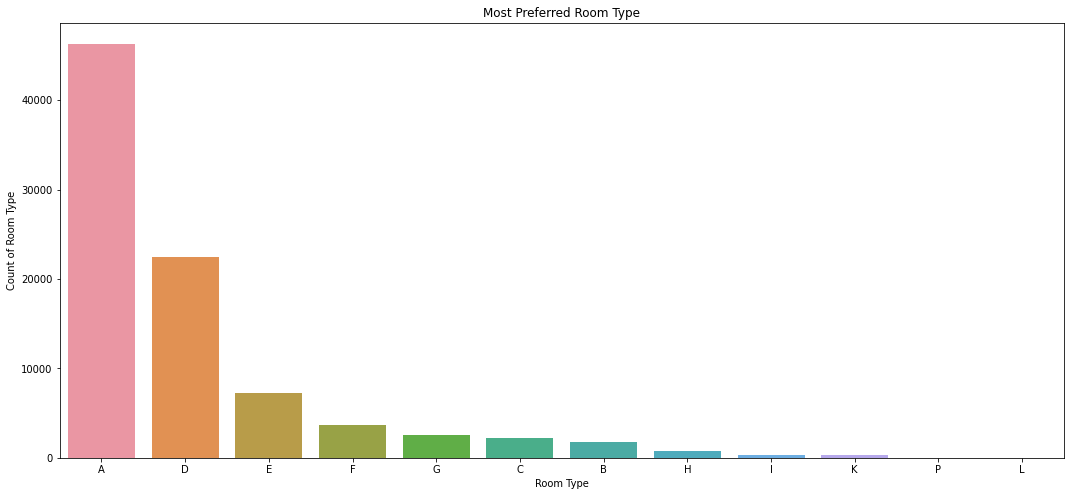

In [70]:
#setting plotsize
plt.figure(figsize=(18,8))

#plotting 
sbn.countplot(x=hotel_df['assigned_room_type'],order=hotel_df['assigned_room_type'].value_counts().index)

plt.xlabel('Room Type')   #set xlabel for the plot

plt.ylabel('Count of Room Type')  # set y label for the plot

plt.title("Most Preferred Room Type")  #set title for the plot

    CONCLUSION:Most preffered room type is 'A'.

####(8)From which country the most guests are coming?

Text(0.5, 1.0, 'Number Of Guests From Different Countries')

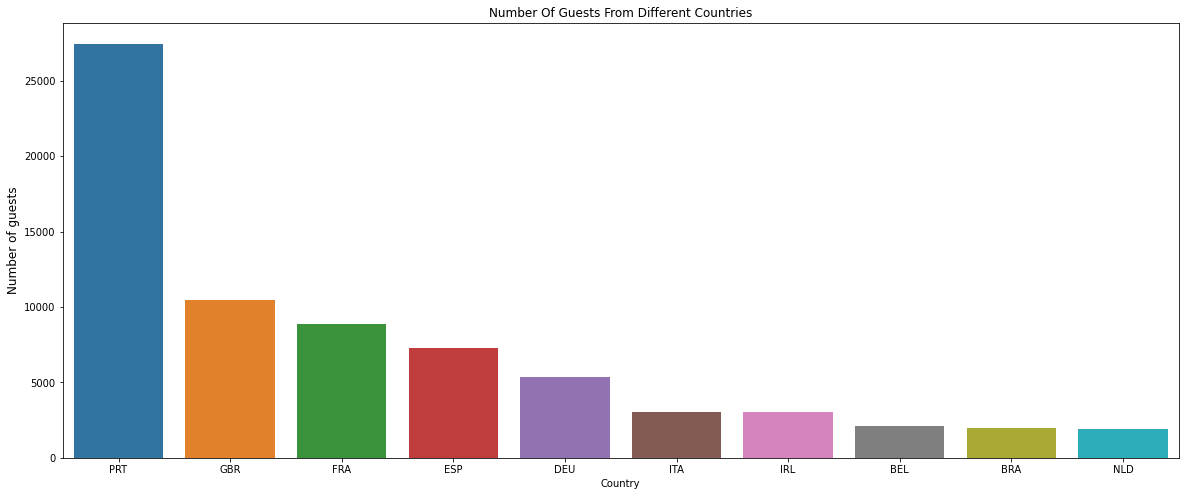

In [71]:
#Counting the guests from various countries
country_df=hotel_df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

#Visualizing
plt.figure(figsize=(20,8))
sbn.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number Of Guests From Different Countries")

    CONCLUSION:Most of the guests are coming from portugal i.e more 25000 guests are from portugal.

####(9)Percentage distribution of required car parking spaces

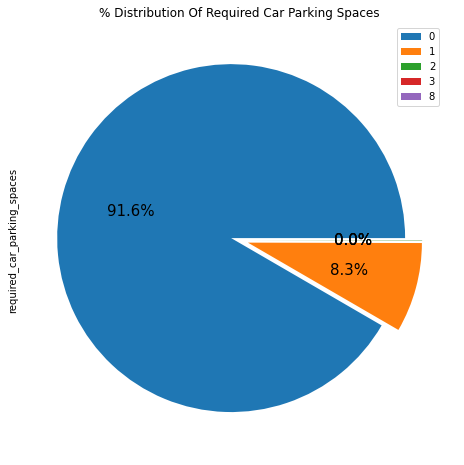

In [72]:
hotel_df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=hotel_df['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution Of Required Car Parking Spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

    CONCLUSION:
    91.6 % guests did not required the parking space.
    Only 8.3 % guests required only 1 parking space.

####(10)Hotel with higher lead time.

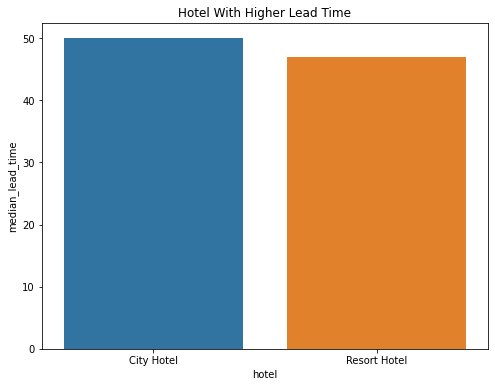

In [73]:
v3 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,6))
sbn.barplot(x = v3['hotel'], y = v3['median_lead_time'] )
plt.title('Hotel With Higher Lead Time')
plt.show()

    CONCLUSION:Lead time in city hotel is slightly higher in resort time.

####(11)Hotel with longer waiting time.

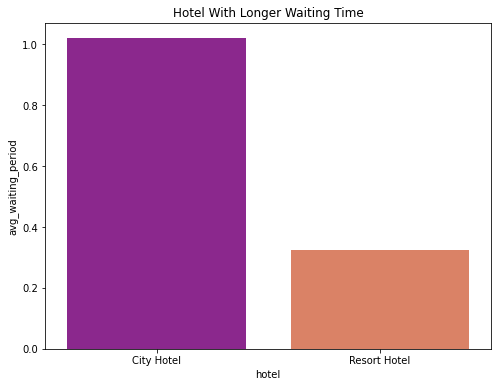

In [74]:
v4 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,6))
sbn.barplot(x = v4['hotel'], y = v4['avg_waiting_period'], palette = 'plasma')
plt.title('Hotel With Longer Waiting Time')
plt.show()

    CONCLUSION:City hotel has slightly longer waiting time.Hence,it is most busier than resort hotel.

####(12)Hotel with higher chance of customers returning for another stay.

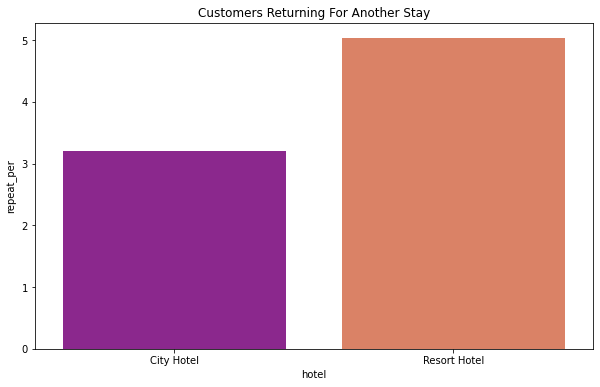

In [75]:
#Counting repeat customer bookings
repeat_customer = hotel_df[hotel_df['is_repeated_guest'] == 1]
repeat_grp = repeat_customer.groupby('hotel')
a1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeat_guests'})

#Counting total bookings
total_booking = grouped_by_hotel.size()
a2 = pd.DataFrame(total_booking).rename(columns = {0:'total_bookings'})
a3 = pd.concat([a1,a2],axis = 1)

#Calculation repeat percentage
a3['repeat_per'] = round((a3['total_repeat_guests']/a3['total_bookings'])*100,2)

plt.figure(figsize = (10,6))
sbn.barplot(x = a3.index , y = a3['repeat_per'], palette = 'plasma')
plt.title('Customers Returning For Another Stay')
plt.show()

    CONCLUSION:The resort hotel has higher chance of customers returning for another stay.

####(13)Hotel with highest booking cancellation.

In [76]:
#Counting of cancelled booking for each hotel
cancelled_booking = hotel_df[hotel_df['is_canceled'] == 1]
cancelled_grp = cancelled_booking.groupby('hotel')
a1 = pd.DataFrame(cancelled_grp.size()).rename(columns = {0 : 'total_cancelled_bookings'})

#Counting total number of booking for each type of hotel
grouped_by_hotel = hotel_df.groupby('hotel')
total_booking = grouped_by_hotel.size()
a2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
a3 = pd.concat([a1,a2], axis = 1)

# Calculating cancel percentage 
a3['cancel_per'] = round((a3['total_cancelled_bookings']/a3['total_bookings'])*100,2)
a3

,total_cancelled_bookings,total_bookings,cancel_per
hotel,,,
City Hotel,16049,53428,30.04
Resort Hotel,7976,33968,23.48


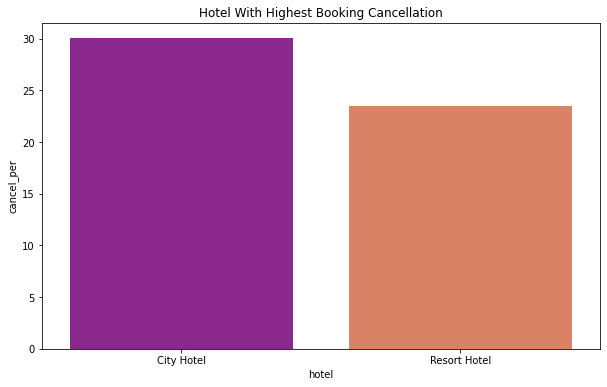

In [77]:
plt.figure(figsize = (10,6))
sbn.barplot(x = a3.index, y = a3['cancel_per'],palette = 'plasma')
plt.title('Hotel With Highest Booking Cancellation')
plt.show()

    CONCLUSION:The rate of cancellation of booking is highest in city hotel.

####(14)Highest revenue generating month.

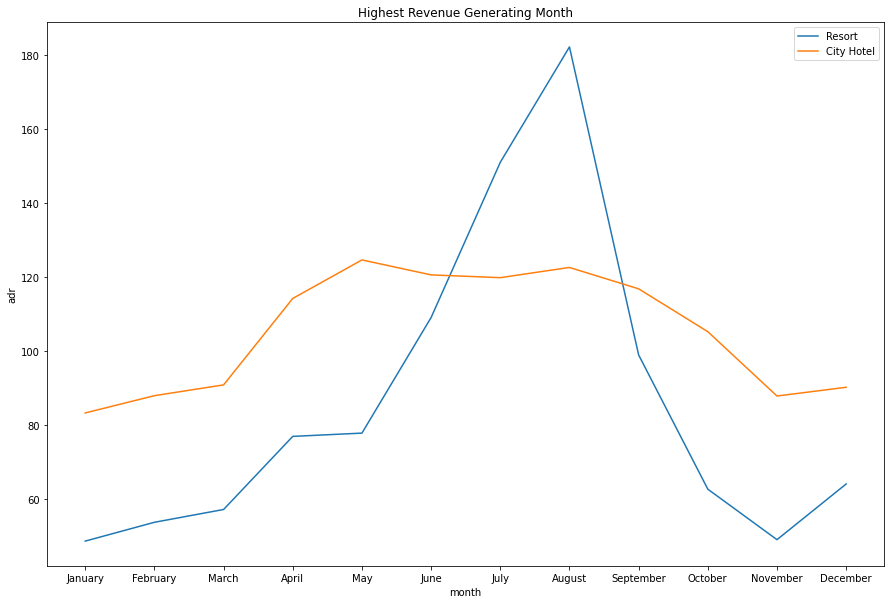

In [78]:
#Finding the highest revenue generating month
resort_data = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)]
city_data = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)]
resort_hotel = resort_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = city_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel_data = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel_data.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel_data['month'] = pd.Categorical(final_hotel_data['month'], categories=months, ordered=True)
final_hotel_data = final_hotel_data.sort_values('month').reset_index()
sbn.lineplot(data=final_hotel_data, x='month', y='price_for_resort')
sbn.lineplot(data=final_hotel_data, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr')
plt.title('Highest Revenue Generating Month')
fig = plt.gcf()
fig.set_size_inches(15,10)

    CONCLUSION:Resort in the month of August generates highest revenue.

####(15)The month with most visitors.

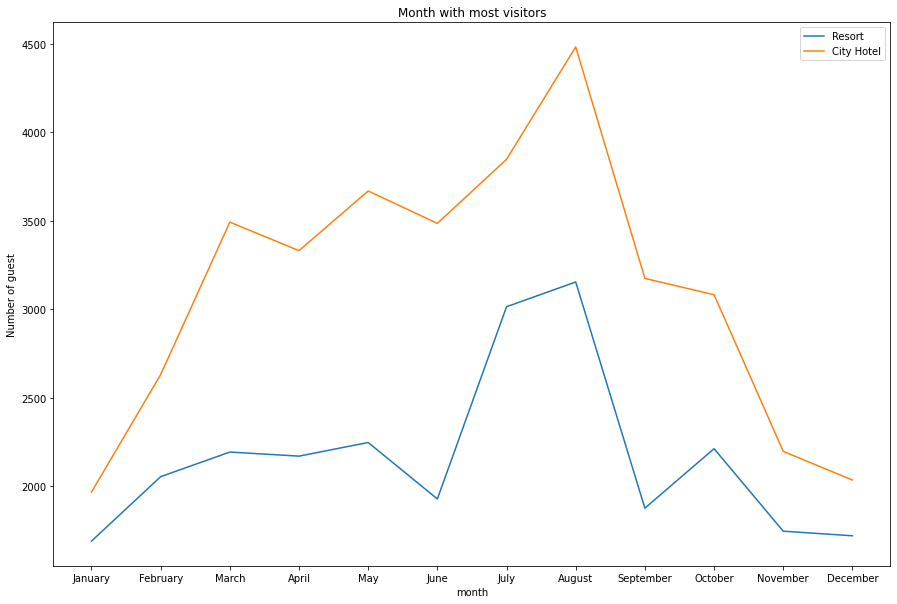

In [79]:
#Finding the most busy months
busy_month = hotel_df['arrival_date_month'].value_counts().reset_index()
busy_month.columns=['months','Number of guests']
busy_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
busy_month['months'] = pd.Categorical(busy_month['months'], categories=months, ordered=True)
busy_month.sort_values('months').reset_index()

resort_data = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)]
city_data = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)]
resort_hotel = resort_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel= city_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel_data = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel_data.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel_data

resort_guest = resort_data['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = city_data['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest_data=resort_guest.merge(city_guest, on = 'month')
final_guest_data.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest_data
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest_data['month'] = pd.Categorical(final_guest_data['month'], categories=months, ordered=True)
final_guest_data = final_guest_data.sort_values('month').reset_index()

#Plotting the month with most visitors
sbn.lineplot(data=final_guest_data, x='month', y='no of guests in resort')
sbn.lineplot(data=final_guest_data, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
plt.title('Month with most visitors')
fig = plt.gcf()
fig.set_size_inches(15,10)

    CONCLUSION:The month of august welcomes the most number of guests.

####(16)Most common channel for booking hotels.

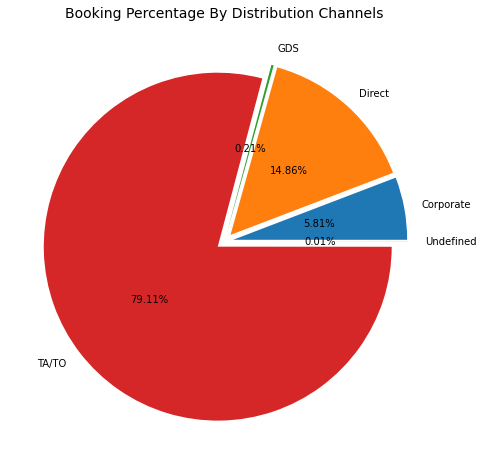

In [80]:
group_by_dist = hotel_df.groupby('distribution_channel')
hotel_pd = pd.DataFrame(round((group_by_dist.size()/hotel_df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_per'})
plt.figure(figsize = (8,8))
data = hotel_pd['Booking_per']
labels = hotel_pd['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking Percentage By Distribution Channels", fontsize=14);

    CONCLUSION:TA/TO is the most common channel for booking hotels.

####(17)Distribution channel with better revenue generating deals for hotels.

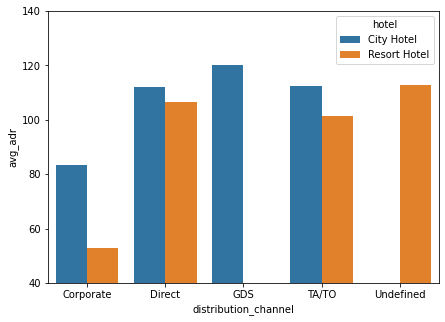

In [81]:
group_by_dist_hotel = hotel_df.groupby(['distribution_channel', 'hotel'])
v3 = pd.DataFrame(round((group_by_dist_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sbn.barplot(x = v3['distribution_channel'], y = v3['avg_adr'], hue = v3['hotel'])
plt.ylim(40,140)
plt.show()

    CONCLUSION:GDS channel brings higher revenue generating deals for City hotel.
    Resort hotel has more revnue generating deals by direct and TA/TO  channel.
    Resort Hotel need to increase outreach on GDS channel to increase revenue.

####(18)Distribution channel with highest cancellation percentage.

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution Channel')

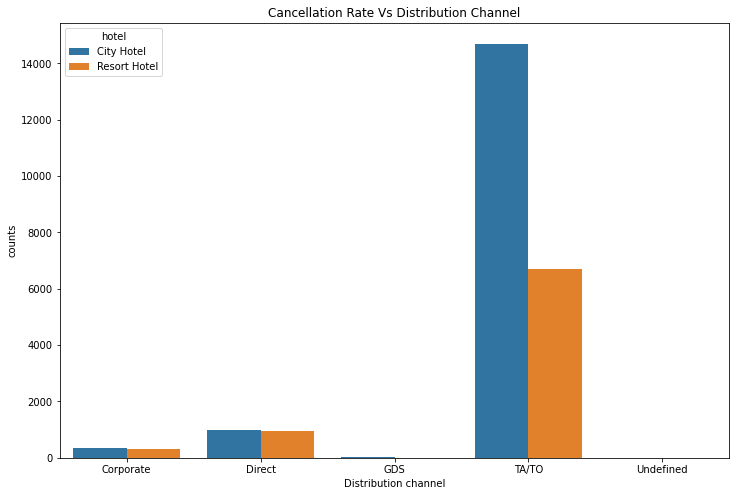

In [82]:
canceled_df=hotel_df[hotel_df['is_canceled'] == 1] 

#Grouping by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
canceled_df

#set plot size and plot barchart 
plt.figure(figsize=(12,8))
sbn.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df)

#Set labels
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution Channel')

    CONCLUSION:TA/TO has highest booking cancellation percentage.Bookings made via TA/TO is 30% likely to get cancelled.

####(19)Correlation of columns

In [83]:
num_hotel_df = hotel_df[['lead_time','total_stay','is_repeated_guest','total_people','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','adr','required_car_parking_spaces','total_of_special_requests','days_in_waiting_list','booking_changes']]

Text(0.5, 1.0, 'Co-relation Of The Columns')

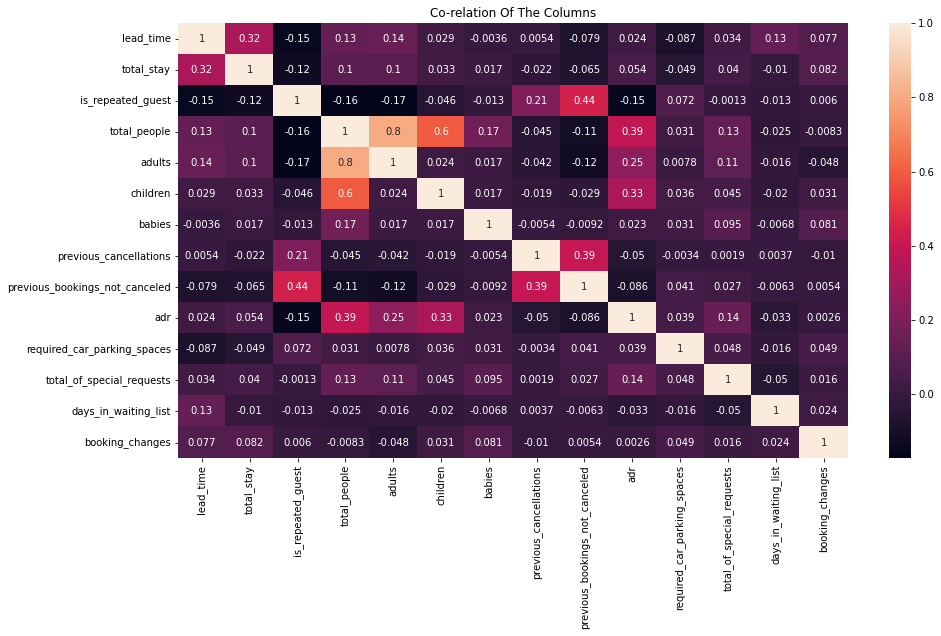

In [84]:
corrmat = num_hotel_df.corr()
plt.figure(figsize=(15,8))
sbn.heatmap(corrmat,annot=True)
plt.title('Co-relation Of The Columns')

    CONCLUSION:

    1.'total_people' and 'adult' are slightly positive correlated which means that most people staying in the hotel are adults.

    2.'total_people' and 'children' are slightly positive correlated which means that the most people staying in the hotel are also 
    children but is usually less than adults.

    3.'is_repeated_guest' and 'previous_bookings_not_canceled' are positively correlated which means that the repeated guests
    are mostly those who have not cancelled their bookings earlier.

In [84]:
import pandas as pd
import seaborn as sbn
import 